In [20]:
import pandas as pd
from pycaret.regression import setup
from pycaret.regression import compare_models, tune_model
import common

data_numerical_transformed = pd.read_csv("data_numerical_transformed.csv", header=None)
data_categorical_transformed = pd.read_csv("data_categorical_transformed.csv", header=None)
data_numerical_transformed.columns = ["num_" + str(i) for i in range(data_numerical_transformed.shape[1])]
data_categorical_transformed.columns = ["cat_" + str(i) for i in range(data_categorical_transformed.shape[1])]

data_numerical_transformed = data_numerical_transformed.iloc[1:, :]
data_categorical_transformed = data_categorical_transformed.iloc[1:, :]

data = pd.read_csv("VehiclesDBV2.csv", header=None)
data.columns = data.iloc[0, :]
data = data.iloc[1:, :]

df = pd.concat([data_numerical_transformed, data_categorical_transformed], axis=1)

In [21]:
data['NSXCOLPA_Y'] = data['NSXCOLPA_Y'].astype(float)
data['EXPOSURE_W'] = data['EXPOSURE_W'].astype(float)

df['w'] = data['EXPOSURE_W']
df['y'] = data['NSXCOLPA_Y']
df = df.rename(columns={'num_0': 'id'})
# df = df.drop('cat_0', 1)

df = df[df['y'].notna()]
# data['NSXCOLPA_Y']/data['EXPOSURE_W']

In [3]:
df

,id,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,w,y
1,0.0,-10.315921,-0.880808,-0.479048,0.743459,0.861343,3.786340,-2.250734,0.332949,3.644950,0.087404,2.641549,-5.496418,-0.618247,1.008836,2.600353,1.691617,5.461253,-2.223938,4.232430,-0.667203,-0.358272,0.0,0.058946,1.700879,-0.750558,-3.209988,0.132612,-0.884044,-0.107680,-0.596834,0.182615,-0.222538,-0.179187,11.0,0.0
2,1.0,-5.085884,0.880114,-0.502839,0.860867,2.220409,3.116496,-2.418364,-3.021635,4.212760,-0.344109,2.884227,-8.190262,-0.321220,-0.216213,-0.695059,-0.193385,-0.494529,0.678041,0.200546,-0.185276,-0.638634,1.0,0.059240,1.736541,-0.772356,-3.260298,0.818911,-0.558489,0.459239,-0.744947,0.187830,-0.114154,-0.793243,1.0,0.0
3,2.0,-4.058179,0.458607,-0.229035,0.138895,0.295208,-0.384791,-2.100328,-0.226591,0.334858,0.984306,0.601561,-0.143562,0.379611,-0.726546,-0.934139,0.321077,-0.729823,-0.202707,-1.188195,-0.524954,0.220442,2.0,0.059240,1.736541,-0.772356,-3.260298,0.818911,-0.558489,0.459239,-0.744947,0.187830,-0.114154,-0.793243,2.0,0.0
4,3.0,-2.942188,1.260607,-0.353052,0.230722,1.434097,0.540403,-0.797194,-0.964083,0.749919,0.565725,0.074184,0.825423,0.793125,-1.454680,0.427415,0.697590,-0.552318,0.746657,-1.175690,0.129625,0.027822,3.0,0.057188,1.497228,-0.540219,-3.189194,0.356048,-0.604520,0.194551,1.433017,-0.091897,-0.384155,0.388118,8.0,0.0
5,4.0,-2.655290,1.838256,-0.754301,1.102561,3.160324,3.924575,-2.278791,-2.755842,4.524624,-0.103602,2.518091,-6.530759,0.063464,-0.950270,1.304011,0.127173,0.959859,1.002454,1.181650,0.332773,-1.179733,4.0,0.059024,1.562417,-0.520348,-3.388064,0.441152,-0.802036,0.366499,-0.549498,0.126804,-0.333677,0.196934,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26444,26443.0,-1.043610,-1.168500,0.367164,-0.265842,-1.558394,-1.452834,0.476756,-0.559574,-0.147561,-0.082050,0.023222,-0.486947,0.140505,-0.204817,0.665145,-0.572941,0.000660,-0.237201,0.341903,-1.206511,-0.343831,26443.0,-0.009066,0.198823,-0.374441,0.304536,0.071425,-0.078909,-0.277447,-0.017383,0.029024,-0.157057,0.034125,0.0,0.0
26445,26444.0,1.185222,-0.522416,0.245266,-0.001189,-1.423710,0.546572,-0.572099,0.501152,-0.212039,0.350914,0.230037,-0.271476,0.204457,-0.207059,-0.292387,0.358409,-0.751216,0.318179,-0.067925,-1.083179,-0.282536,26444.0,-0.009208,-0.152629,0.200853,-0.009826,-0.168517,-0.145020,-0.269037,-0.003203,0.051328,-0.067292,-0.023910,0.0,0.0
26446,26445.0,-0.748450,-1.278713,0.393357,-0.264902,-1.760407,-1.804340,-0.047895,-0.470203,0.011939,0.168751,0.203213,-0.542695,0.186369,-0.336393,0.906762,-0.663495,-0.330617,-0.438415,0.471371,-1.048209,-0.335594,26445.0,-0.009292,0.088105,-0.223802,0.259545,0.166564,-0.005888,-0.372756,-0.025068,0.061191,-0.170271,0.017542,0.0,0.0
26447,26446.0,2.489471,-1.446210,22.006722,1.592706,3.571459,-1.447492,-1.892134,-0.481402,0.258142,-0.270166,0.044572,0.346521,-9.779685,-2.107676,0.616493,1.252469,-0.238883,-0.165452,-1.364522,0.165498,-0.197343,26446.0,-0.010648,0.134023,-0.049825,0.414665,0.794231,-0.126806,-1.278575,-0.078530,0.217395,-0.522872,0.353752,0.0,0.0


In [4]:
grid = setup(data=df, target=df.columns[-1])

compare_0 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.4684,1.1605,1.0695,0.9006,0.3198,0.5620,0.1220
lr,Linear Regression,0.4711,1.1596,1.0691,0.9005,0.3218,0.5596,0.3330
ridge,Ridge Regression,0.4711,1.1596,1.0691,0.9005,0.3218,0.5596,0.0170
en,Elastic Net,0.4679,1.1600,1.0693,0.9005,0.3197,0.5624,0.0170
omp,Orthogonal Matching Pursuit,0.4683,1.1592,1.0689,0.9005,0.3209,0.5611,0.0070
br,Bayesian Ridge,0.4671,1.1595,1.0690,0.9005,0.3200,0.5612,0.0260
lar,Least Angle Regression,0.4714,1.1599,1.0692,0.9004,0.3220,0.5597,0.0180
huber,Huber Regressor,0.4287,1.1682,1.0743,0.9002,0.3141,0.6132,0.1760
et,Extra Trees Regressor,0.4914,2.8771,1.3666,0.8659,0.3467,0.5908,1.3960
catboost,CatBoost Regressor,0.4759,3.5088,1.4529,0.8521,0.3250,0.5896,10.8260


In [5]:
tuned_compare_0 = tune_model(compare_0)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4426,0.8831,0.9397,0.9127,0.3092,0.5430
1,0.4761,1.1469,1.0709,0.8751,0.3228,0.5947
2,0.4757,0.9838,0.9918,0.8909,0.3238,0.5545
3,0.4980,1.6207,1.2731,0.8713,0.3258,0.5733
4,0.4632,0.9514,0.9754,0.9113,0.3177,0.5536
5,0.4734,1.3358,1.1558,0.9118,0.3147,0.5316
6,0.5014,1.8012,1.3421,0.9641,0.3118,0.5442
7,0.4491,0.8432,0.9183,0.8934,0.3235,0.5538
8,0.4584,1.0369,1.0183,0.8550,0.3156,0.5616


In [40]:
from pycaret.regression import plot_model
plot_model(tuned_compare_0, plot = 'error')

NameError: name 'tuned_compare_0' is not defined

In [4]:
data_numerical_transformed = pd.read_csv("data_numerical_transformed.csv", header=None)
data_numerical_transformed.columns = ["num_" + str(i) for i in range(data_numerical_transformed.shape[1])]

data_numerical_transformed = data_numerical_transformed.iloc[1:, :]

data = pd.read_csv("VehiclesDBV2.csv", header=None)
data.columns = data.iloc[0, :]
data = data.iloc[1:, :]

df = data_numerical_transformed

data['NSXCOLPA_Y'] = data['NSXCOLPA_Y'].astype(float)
data['EXPOSURE_W'] = data['EXPOSURE_W'].astype(float)

df['w'] = data['EXPOSURE_W']
df['y'] = data['NSXCOLPA_Y']
df = df.rename(columns={'num_0': 'id'})
# df = df.drop('cat_0', 1)

df = df[df['y'].notna()]
# data['NSXCOLPA_Y']/data['EXPOSURE_W']

grid = setup(data=df, target=df.columns[-1])

compare_1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.4719,1.1042,1.0398,0.8887,0.3185,0.5608,0.1200
en,Elastic Net,0.4714,1.1034,1.0395,0.8887,0.3184,0.5612,0.0160
lr,Linear Regression,0.4708,1.1036,1.0397,0.8886,0.3192,0.5606,0.3400
ridge,Ridge Regression,0.4708,1.1036,1.0397,0.8886,0.3192,0.5606,0.0160
lar,Least Angle Regression,0.4708,1.1036,1.0397,0.8886,0.3192,0.5606,0.0160
omp,Orthogonal Matching Pursuit,0.4709,1.1028,1.0394,0.8886,0.3187,0.5614,0.0160
br,Bayesian Ridge,0.4703,1.1031,1.0394,0.8886,0.3187,0.5608,0.0190
huber,Huber Regressor,0.4263,1.1089,1.0432,0.8870,0.3119,0.6161,0.0760
et,Extra Trees Regressor,0.4871,2.8759,1.3610,0.8504,0.3433,0.5985,1.0040
knn,K Neighbors Regressor,0.4857,2.9854,1.4108,0.8410,0.3514,0.6353,0.0760


In [5]:
tuned_compare_1 = tune_model(compare_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4547,0.7474,0.8645,0.8328,0.3239,0.5737
1,0.4813,1.5163,1.2314,0.9188,0.3103,0.5301
2,0.4985,1.2848,1.1335,0.9132,0.3332,0.6048
3,0.4418,0.9113,0.9546,0.9070,0.3068,0.5540
4,0.4766,0.8849,0.9407,0.8421,0.3217,0.5569
5,0.4532,0.9645,0.9821,0.8657,0.3167,0.5421
6,0.4876,1.3750,1.1726,0.8862,0.3177,0.5894
7,0.5121,1.7292,1.3150,0.9669,0.3222,0.5635
8,0.4759,0.8956,0.9464,0.8691,0.3217,0.5512


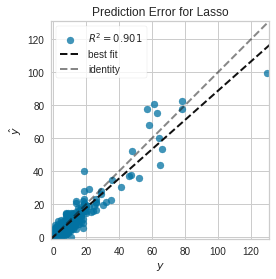

In [42]:
plot_model(tuned_compare_1, plot = 'error')

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

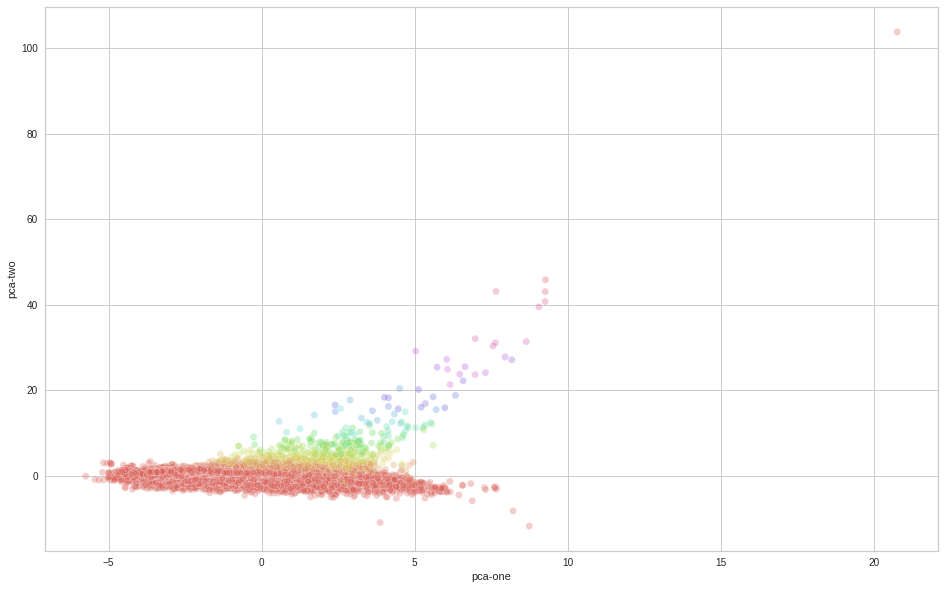

In [38]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

pca_result = pipeline.fit_transform(df)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", df['y'].unique().shape[0]),
    data=df,
    legend="full",
    alpha=0.3
)
plt.legend([],[], frameon=False)


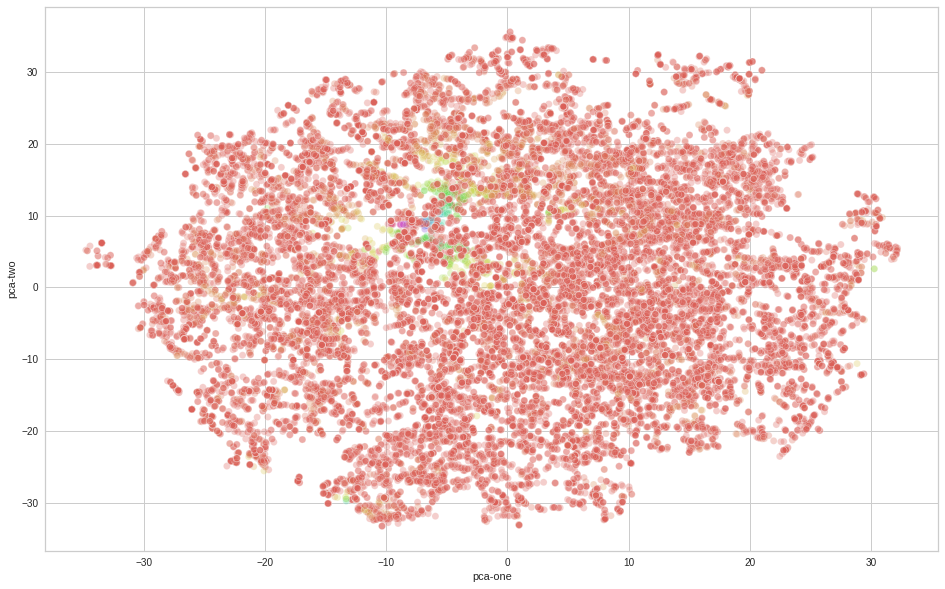

In [39]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', TSNE(n_components=3))])

pca_result = pipeline.fit_transform(df)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", df['y'].unique().shape[0]),
    data=df,
    legend="full",
    alpha=0.3
)
plt.legend([],[], frameon=False)
